<a href="https://colab.research.google.com/github/OmdenaAI/abakaliki-chapter-theft-churches-problem/blob/main/Copy_of_Naira_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To ensure that our dependencies and libraries needed for this project are are available and upto date
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Avoid OOM errors
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
data_dir='/content/drive/MyDrive/Images/sorted_data'
os.listdir(data_dir)

['#20', '#200', '#500', '#50', '#1000', '#10', '#100', '#5']

In [5]:
img_extension=['jpeg','jpg','png']

In [6]:
img_array=cv2.imread(os.path.join(data_dir,'#10', '10.jpg'))

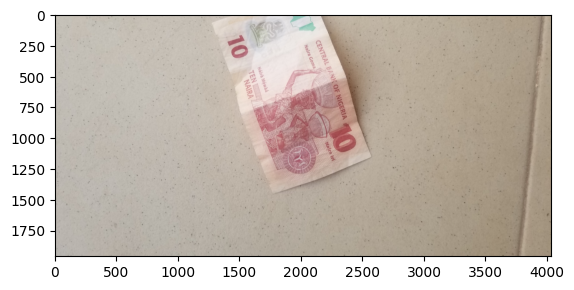

In [7]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [8]:
for img_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,img_class)):
    image_path = os.path.join(data_dir,img_class, image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in img_extension:
        print('image {} does not have apt extension'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('{} ia a problematic file'.format(image_path))

In [9]:
# putting our cleaned data into keras and building our data pipeline
dataset= tf.keras.utils.image_dataset_from_directory(data_dir)
dataset

Found 691 files belonging to 8 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
#+for looping through our data pipeline or allowing access to data pipeline
data_iterator = dataset.as_numpy_iterator()

In [11]:
# actually accessing data pipeline
batch= data_iterator.next()

In [12]:
len(batch)

2

In [13]:
print(batch[0])
print(batch[1])

[[[[ 50.30078   48.30078   33.30078 ]
   [ 71.45703   68.58203   53.58203 ]
   [ 63.304688  60.898438  45.898438]
   ...
   [ 80.359375  76.359375  73.359375]
   [ 84.859375  79.859375  75.14844 ]
   [105.55859   98.77734   96.11719 ]]

  [[ 70.62109   63.371094  49.996094]
   [ 58.32422   55.88672   43.10547 ]
   [ 81.50391   77.50391   66.50391 ]
   ...
   [ 76.94141   73.94141   68.94141 ]
   [101.13281   98.50781   91.38281 ]
   [ 99.55469   94.71875   90.36328 ]]

  [[ 63.023438  53.773438  41.398438]
   [ 60.964844  54.421875  44.26953 ]
   [ 68.90625   64.90625   53.90625 ]
   ...
   [ 80.05469   78.99219   73.99219 ]
   [ 77.52734   76.52734   71.52734 ]
   [ 81.25781   81.25781   73.25781 ]]

  ...

  [[212.8086   210.9336   202.3086  ]
   [214.8789   211.8789   206.63672 ]
   [213.1875   210.1875   205.1875  ]
   ...
   [132.125    136.125    135.125   ]
   [129.0586   135.0586   135.0586  ]
   [151.70312  155.70312  158.70312 ]]

  [[212.17578  210.30078  202.17578 ]
   [212

In [14]:
print(batch[0].shape) # images represented as numpy array
print(batch[1].shape) #classes the images belong to

(32, 256, 256, 3)
(32,)


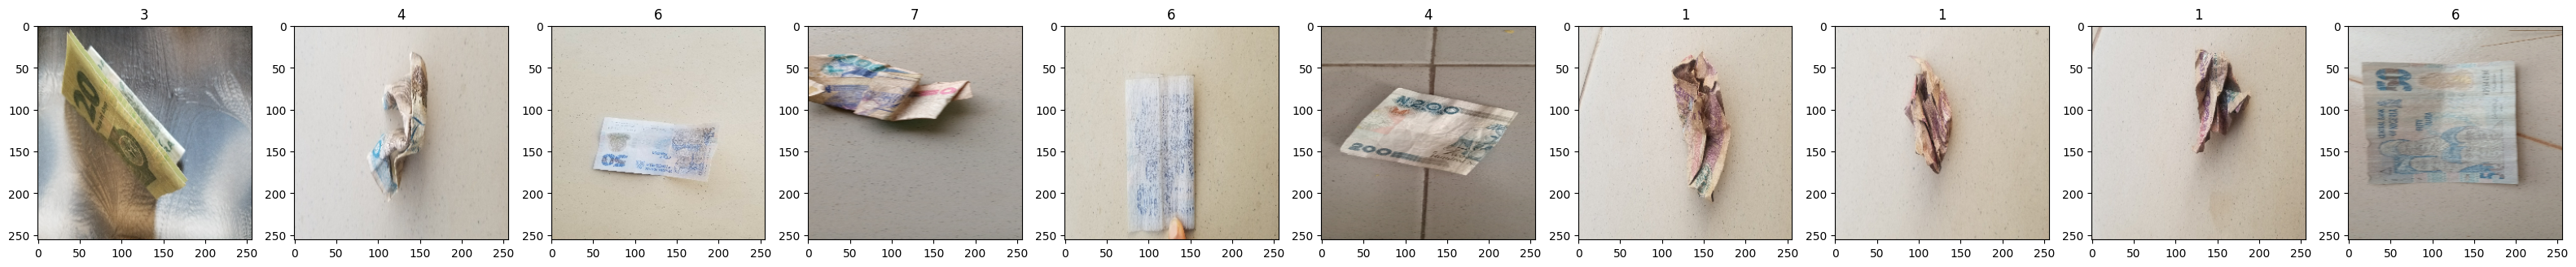

In [15]:
# to dictate which class represent a particular group of data
fig, ax = plt.subplots(ncols=10, figsize=(40,40))
for idx, img in enumerate(batch[0][:10]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [16]:
'''
0 = #10
1 = #100
2 = #1000
3 = #20
4 = #200
5 = #5
6 = #50
7 = #500
'''

'\n0 = #10\n1 = #100\n2 = #1000\n3 = #20\n4 = #200\n5 = #5\n6 = #50\n7 = #500\n'

# Data Preprocessing

In [17]:
scaled_data=dataset.map(lambda x, y: (x/255, y))
scaled_iterator= scaled_data.as_numpy_iterator()
scaled_batch= scaled_iterator.next()

In [18]:
print(scaled_batch[0].max())
print(scaled_batch[0].min())

1.0
0.0


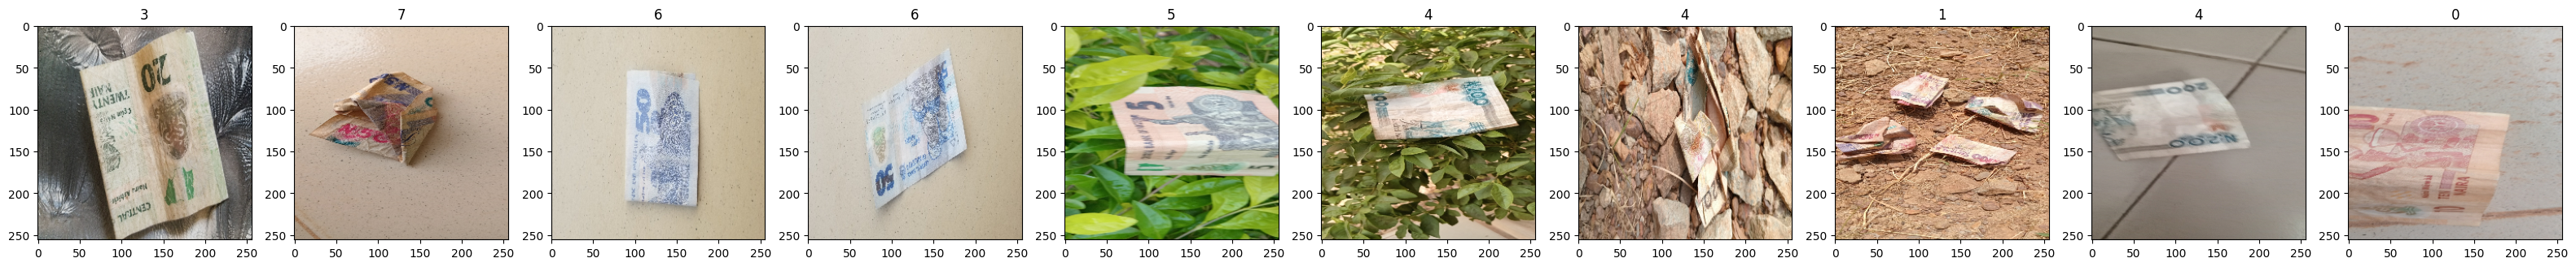

In [19]:
fig, ax = plt.subplots(ncols=10, figsize=(40,40))
for idx, img in enumerate(scaled_batch[0][:10]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(scaled_batch[1][idx])

In [20]:
len(scaled_data)

22

In [21]:
#splitting data into test, train and validation
train_size=int(len(scaled_data)*.625)
val_size=int(len(scaled_data)*.25)
test_size=int(len(scaled_data)*.125)

In [22]:
train=scaled_data.take(train_size)
val=scaled_data.skip(train_size).take(val_size)
test=scaled_data.skip(train_size+val_size).take(test_size)

# 2.0 Model Building

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential(
    [
        Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)),
        MaxPooling2D(),
     
        Conv2D(32,(3,3),1, activation='relu'),
        MaxPooling2D(),
     
        Conv2D(16,(3,3),1, activation='relu'),
        MaxPooling2D(),
        
        Flatten(),
     
        Dense(256, activation='relu'),
        Dense(8, activation='softmax')
    ]
)


In [25]:
model.compile('adam', loss= tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 2.1 Training

In [27]:
log_dir='/content/drive/MyDrive/Images/logdir'

In [28]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

In [29]:
history = model.fit(train, epochs= 20, validation_data=val, callbacks= [tb_callback])

Epoch 1/20
13/13 [==============================] - 40s 2s/step - loss: 2.0509 - accuracy: 0.2091 - val_loss: 1.9533 - val_accuracy: 0.1688
Epoch 2/20
13/13 [==============================] - 37s 2s/step - loss: 1.9071 - accuracy: 0.2452 - val_loss: 1.8545 - val_accuracy: 0.2062
Epoch 3/20
13/13 [==============================] - 37s 2s/step - loss: 1.7860 - accuracy: 0.3101 - val_loss: 1.6700 - val_accuracy: 0.4125
Epoch 4/20
13/13 [==============================] - 37s 2s/step - loss: 1.5743 - accuracy: 0.4375 - val_loss: 1.5204 - val_accuracy: 0.4437
Epoch 5/20
13/13 [==============================] - 37s 2s/step - loss: 1.2902 - accuracy: 0.5481 - val_loss: 1.2645 - val_accuracy: 0.5625
Epoch 6/20
13/13 [==============================] - 34s 2s/step - loss: 1.1166 - accuracy: 0.6130 - val_loss: 1.2329 - val_accuracy: 0.5875
Epoch 7/20
13/13 [==============================] - 33s 2s/step - loss: 0.9034 - accuracy: 0.6707 - val_loss: 0.9910 - val_accuracy: 0.6500
Epoch 8/20
13/13 [==

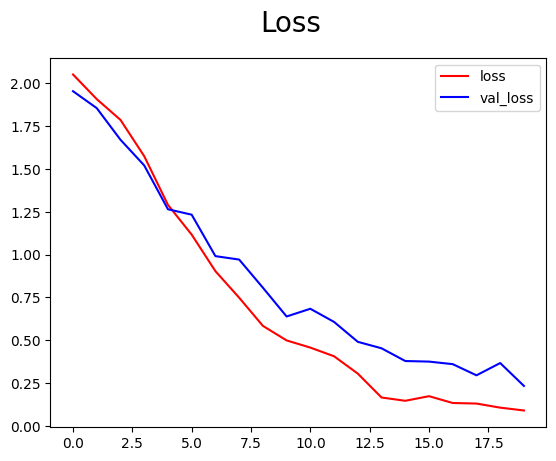

In [30]:
fig=plt.figure()
plt.plot(history.history['loss'], color='red', label= 'loss')
plt.plot(history.history['val_loss'], color='blue', label= 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

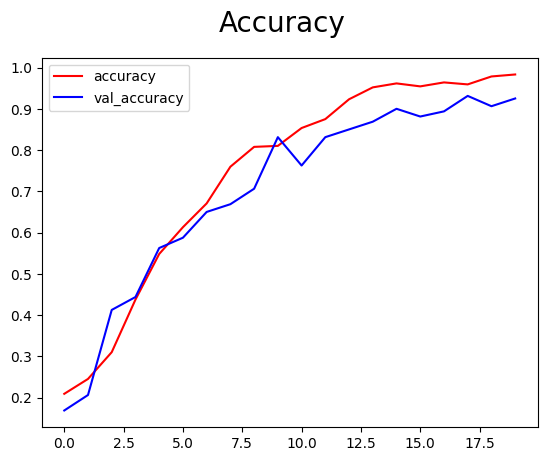

In [31]:
fig=plt.figure()
plt.plot(history.history['accuracy'], color='red', label= 'accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label= 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 2.2 Evaluation

In [32]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score

In [34]:
yhat=[]
y_actual=[]
for batch in test.as_numpy_iterator():
    #for sets in batch:
    x, y = batch
    
    y_pred= model.predict(x)
    y_pred= np.argmax(y_pred,axis=1)
    y_pred= np.array(y_pred)
    
    yhat.append(y_pred)
    y_actual.append(y)

#y_pred=[np.argmax(value) for value in y_pred]     

1/1 [==============================] - 0s 32ms/step


In [35]:
yhat=np.append(yhat[0],yhat[1])
y_actual=np.append(y_actual[0],y_actual[1])

In [36]:
precision= precision_score(y_actual, yhat, average='weighted')
recall= recall_score(y_actual, yhat, average='weighted')
accuracy= accuracy_score(y_actual, yhat)

print(f'precision : {precision}, Recall : {recall}, Accuracy : {accuracy}')

precision : 0.8881392045454546, Recall : 0.859375, Accuracy : 0.859375


In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_actual, yhat)

array([[ 8,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 10,  0,  0,  1,  0,  0,  2],
       [ 0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 14,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  3,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6]])

In [38]:
from sklearn.metrics import f1_score

print('macro_f1 :{}'.format(f1_score(y_actual, yhat, average='macro')))
print('micro_f1 :{}'.format(f1_score(y_actual, yhat, average='micro')))
print('weighted_f1 :{}'.format(f1_score(y_actual, yhat, average='weighted')))
print('No_Average_f1 :{}'.format(f1_score(y_actual, yhat, average=None)))
print('No_Average_f1 :{}'.format(f1_score(y_actual, yhat, average=None)))


macro_f1 :0.8991013071895425
micro_f1 :0.859375
weighted_f1 :0.8650428921568627
No_Average_f1 :[0.88888889 0.83333333 1.         1.         0.82352941 1.
 0.94117647 0.70588235]
No_Average_f1 :[0.88888889 0.83333333 1.         1.         0.82352941 1.
 0.94117647 0.70588235]


In [39]:
dict1= {0 : '#10', 1 : '#100', 2 : '#1000', 3 : '#20', 4 : '#200', 5 : '#5', 6 : '#50', 7 : '#500'}
prediction=[]
for x in yhat:
  y=dict1[x]
  prediction.append(y)
  
prediction

['#500',
 '#100',
 '#100',
 '#10',
 '#200',
 '#100',
 '#100',
 '#200',
 '#50',
 '#5',
 '#200',
 '#20',
 '#200',
 '#1000',
 '#20',
 '#200',
 '#50',
 '#500',
 '#50',
 '#10',
 '#200',
 '#10',
 '#500',
 '#200',
 '#500',
 '#200',
 '#10',
 '#10',
 '#50',
 '#200',
 '#200',
 '#100',
 '#100',
 '#50',
 '#100',
 '#10',
 '#200',
 '#10',
 '#5',
 '#500',
 '#10',
 '#20',
 '#200',
 '#50',
 '#500',
 '#500',
 '#200',
 '#100',
 '#500',
 '#20',
 '#500',
 '#50',
 '#100',
 '#200',
 '#5',
 '#1000',
 '#50',
 '#100',
 '#100',
 '#500',
 '#10',
 '#200',
 '#200',
 '#500']

# Test

testing our model using random pictures

In [40]:
test_dir='/content/drive/MyDrive/Images/Test_images'
os.listdir(test_dir)

['20230102_071707.jpg',
 '20230102_071712.jpg',
 '20230102_071714.jpg',
 '20230111_125042.jpg',
 '20230115_082900.jpg',
 '20230115_082833.jpg',
 '20230115_083342.jpg',
 '20230115_083346.jpg']

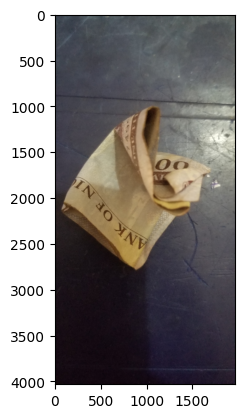

In [41]:
img = cv2.imread(os.path.join(test_dir,'20230111_125042.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

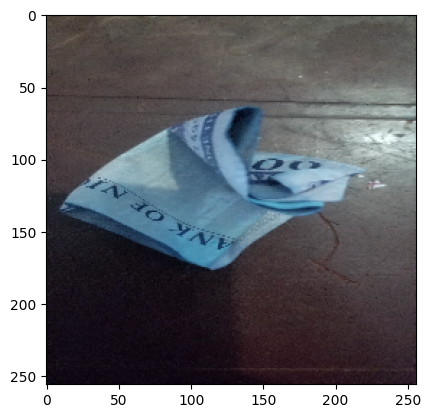

In [42]:
resized_img=tf.image.resize(img,(256,256))
plt.imshow(resized_img.numpy().astype(int))
plt.show()

In [43]:
pred=model.predict(np.expand_dims(resized_img/255,0))
pred= np.argmax(pred,axis=1)
print(f'Currency :{dict1[pred[0]]}')

1/1 [==============================] - 0s 275ms/step
Currency :#50


In [44]:
model.save("/content/drive/MyDrive/model.h5")